# Testando a classe do GSC

Como usar a classe:

Ao instanciar um objeto dessa classe, basta enviar um array com os sinais originais dos microfones e pronto.
Depois, é possível obter o sinalSemBeamforming (soma dos sinais originais), sinalBeamformado (sinal após um beamforming simples) e sinalFinalGSC utilizando o método obterSinaisResultantes().

O atributo tempoProcessamentoGSC guarda o tempo total de processamento do algoritmo, desde o momento que se iniciou o cálculo dos delays entre os microfones até o momento em que o sinalFinalGSC foi criado.

Caso estiver simulando um array de microfones e já conhecer os delays entre eles, também é possível pular o processamento que busca essas defasagens, bastando enviar no construtor um array com os delays (lembrando que esse array deve começar com 0, pois também é necessário possuir a defasagem entre o mic0 e o próprio mic0).

In [8]:
from IPython.display import Audio
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/home/dimi/Programming/IC2019/DOA/Python')
from GeneralizedSidelobeCancellerClass import GeneralizedSidelobeCanceller

## Abrindo o áudio para testar a classe

A simulação 3 contém apenas um arquivo mono de um sinal de volz puro. Vou usar a classe de simular um array de microfones para gerar os sinais simulados com ruído.

In [3]:
# IMPORTANDO A CLASSE DE SIMULACAO DE ARRAY DE MICROFONES
from SimularArrayMicrofonesClass import SimularArrayMicrofones

# DEFININDO OS PARAMETROS INICIAIS
caminhoArquivo = '/home/dimi/Programming/IC2019/DOA/Gravacoes/Simulacoes/Gravacao3/sinalPuroMono2Segundos.wav'
qtdMics        = 4
amplitudeRuido = 0.01

# INSTANCIANDO UM OBJETO DA CLASSE 
objSimularArrayMics = SimularArrayMicrofones(caminhoArquivo, qtdMics, amplitudeRuido)

# OBTENDO O ARRAY DE SINAIS E DE DELAYS E A FREQ DE AMOSTRAGEM
arraySinaisSimulados, arrayDelays, freqAmostragem = objSimularArrayMics.obterResultado()

## Testando a classe

#### Instanciando um objeto da classe GSC (todo o processamento é feito aqui)

Aqui eu também vou mandar o array de delays já que eu estou simulando um array de microfones e sei os valores dos delays. Mas em um caso real, basta omitir esse parâmetro que o padrão é None, e ele calcula as defasagens sozinho.

In [4]:
objGSC = GeneralizedSidelobeCanceller(arraySinaisSimulados, arrayDelays)

Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 1.963231086730957


#### Pegando os sinais gerados e o tempo de processamento

In [5]:
sinalSemBeamforming, sinalBeamformado, sinalFinalGSC = objGSC.obterSinaisResultantes()
print("Tempo gasto:", objGSC.tempoProcessamentoGSC)

Tempo gasto: 1.963231086730957


#### Ouvindo

In [6]:
print("Sinal sem beamforming:")
print("Energia:", objGSC.calcularEnergiaSinal(sinalSemBeamforming))
Audio(data=sinalSemBeamforming, rate=freqAmostragem)

Sinal sem beamforming:
Energia: 191.69705140699818


In [7]:
print("Sinal beamformado:")
print("Energia:", objGSC.calcularEnergiaSinal(sinalBeamformado))
Audio(data=sinalBeamformado, rate=freqAmostragem)

Sinal beamformado:
Energia: 101.076137021072


In [8]:
print("Sinal final GSC:")
print("Energia:", objGSC.calcularEnergiaSinal(sinalFinalGSC))
Audio(data=sinalFinalGSC, rate=freqAmostragem)

Sinal final GSC:
Energia: 104.12006325257434


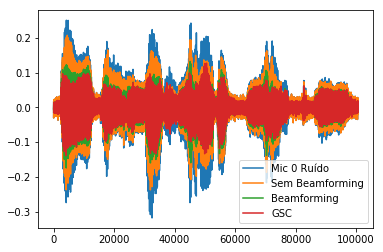

In [16]:
plt.plot(arraySinaisSimulados[0], label="Mic 0 Ruído")
plt.plot(sinalSemBeamforming, label="Sem Beamforming")
plt.plot(sinalBeamformado, label="Beamforming")
plt.plot(sinalFinalGSC, label="GSC")
plt.legend()
plt.show()